In [10]:
import torch
import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from autoencoder import Autoencoder
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
root_dir = "/datasets/glomerulos-normal/"
transforms = T.Compose([
    T.Resize((224,224)),
    #T.Grayscale(),
    T.ToTensor(),
    T.Normalize(std=(.5,.5,.5), mean=(.5,.5,.5))
])
ds = ImageFolder(root_dir, transforms)

In [4]:
ae = Autoencoder(input_size=224, bottleneck_dim=1024, input_channels=3)
checkpoint = torch.load("checkpoints/dae-1000e/best_loss-dae-glomerulos-1000e.pt")
ae.load_state_dict(checkpoint['state_dict']())

<All keys matched successfully>

In [11]:
def chw2hwc(x: torch.Tensor) -> np.array:
    return x[0].permute(1,2,0).detach().numpy()

# Comparison

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


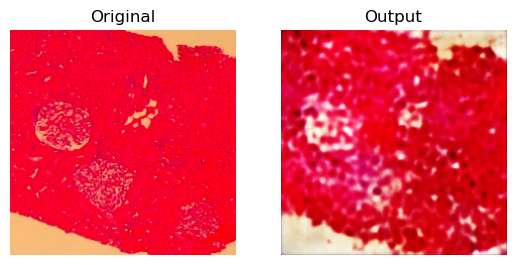

In [16]:
original_img = ds[0][0].view(1,3,224,224)
decoded_img = chw2hwc(ae(original_img))
original_img = chw2hwc(original_img)

plt.subplot(1,2,1).axis('off')
plt.title("Original")
plt.imshow(original_img)
plt.subplot(1,2,2).axis('off')
plt.title("Output")
plt.imshow(decoded_img)


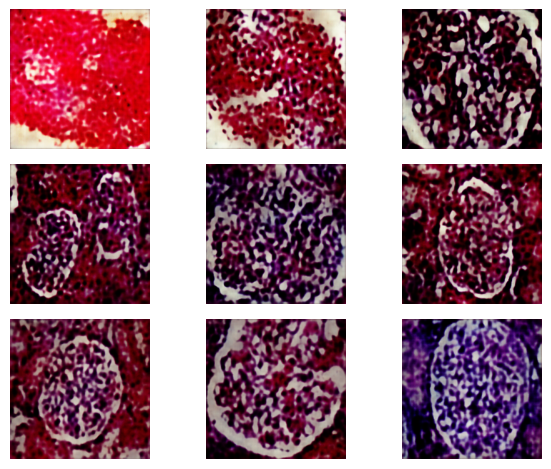

In [17]:

for i in range(1,10):
    plt.subplot(3,3,i)
    img = ds[i-1][0].view(1,3,224,224)
    img = chw2hwc(ae(img))
    img = plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Playing with noise

## Passing noise through decoder

In [19]:
INPUT_SIZE = 224 
HIDDEN_CHANNELS = 8
N_MODULES = 5
EMBED_DIM = 1024
in_features = (math.ceil(INPUT_SIZE/(2**N_MODULES))**2) * (HIDDEN_CHANNELS*(2**N_MODULES))

decoder = ae.get_submodule("decoder")

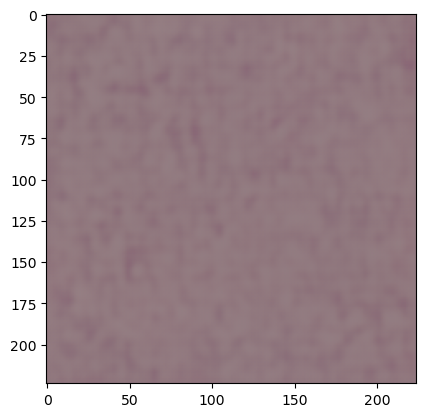

In [20]:
z = torch.rand((EMBED_DIM)).view(1, -1)
r = chw2hwc(decoder(z))
plt.imshow(r)

## Denoising corrupted images

In [21]:
def apply_noise(img, noise_factor=.25, img_size=224, channels=3):
    return (img + noise_factor*torch.randn((img_size,img_size))).view(1,channels,img_size,img_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


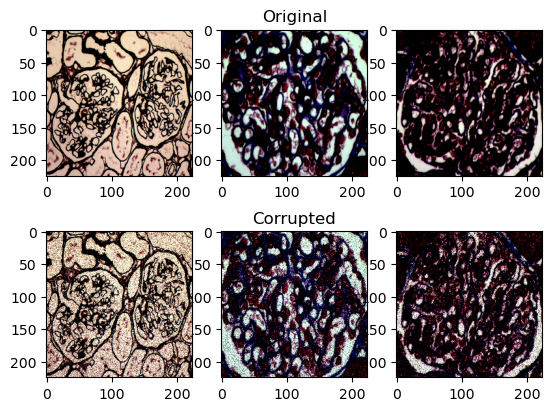

In [22]:
# Original images
img1 = ds[int(torch.rand(1)*100)][0].view(1,3,224,224)
img2 = ds[int(torch.rand(1)*100)][0].view(1,3,224,224)
img3 = ds[int(torch.rand(1)*100)][0].view(1,3,224,224)

# Corrupted images
NOISE_FACTOR = .25
c_img1 = apply_noise(img1, noise_factor=.25)
c_img2 = apply_noise(img2, noise_factor=.25)
c_img3 = apply_noise(img3, noise_factor=.25)

plt.subplot(2,3,2).set_title("Original")
plt.subplot(2,3,1).imshow(chw2hwc(img1))
plt.subplot(2,3,2).imshow(chw2hwc(img2))
plt.subplot(2,3,3).imshow(chw2hwc(img3))
plt.subplot(2,3,5).set_title("Corrupted")
plt.subplot(2,3,4).imshow(chw2hwc(c_img1))
plt.subplot(2,3,5).imshow(chw2hwc(c_img2))
plt.subplot(2,3,6).imshow(chw2hwc(c_img3))

plt.show()

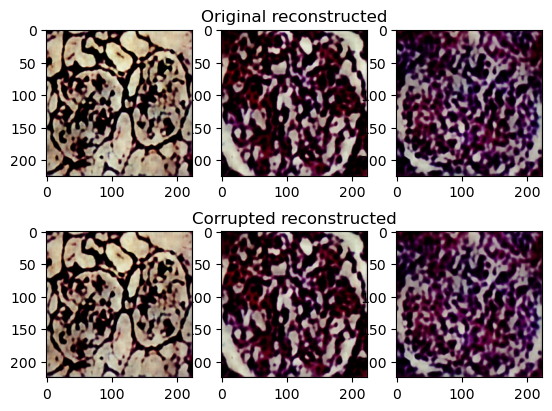

In [24]:
plt.subplot(2,3,2).set_title("Original reconstructed")
plt.subplot(2,3,1).imshow(chw2hwc(ae(img1)))
plt.subplot(2,3,2).imshow(chw2hwc(ae(img2)))
plt.subplot(2,3,3).imshow(chw2hwc(ae(img3)))
plt.subplot(2,3,5).set_title("Corrupted reconstructed")
plt.subplot(2,3,4).imshow(chw2hwc(ae(c_img1)))
plt.subplot(2,3,5).imshow(chw2hwc(ae(c_img2)))
plt.subplot(2,3,6).imshow(chw2hwc(ae(c_img3)))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


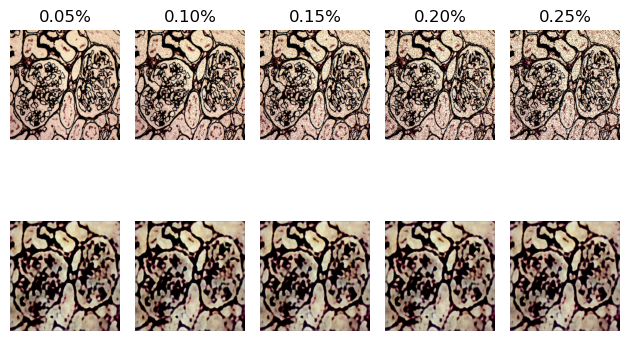

In [29]:
step = .05
for i in range(1,6):
    plt.subplot(2,5,i)
    img = apply_noise(img1[0], noise_factor=step*i)
    img = chw2hwc(img)
    plt.imshow(img)
    plt.title(f"{step*i:.2f}%")
    plt.axis('off')

for i in range(1,6):
    plt.subplot(2,5,5+i)
    img = ae(apply_noise(img1[0], noise_factor=step*i))
    img = chw2hwc(img)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()